In [1]:
import pdb
import numpy as np
import glob
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from labellines import labelLine, labelLines
import seaborn as sns
import math
from statannot import add_stat_annotation
import pickle
from lib_alban.libplot_metrics import *
import csv

In [2]:
def analysis(list_labels_ref, MATCHES, conditions, cube=False, oneinst=False):
    gvalue = np.arange(0.2,0.81,(0.8-0.2)/(len(conditions)-1))
    colors_ref = [tuple([i, i, i]) for i in gvalue]
    
    
    path2illus = '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_analysis/AlbanNetsupeeveepatterns/'
    ### DATA FOR VR

    with open(path2illus + 'illutest_TwoCubesBlendereevee2p9_AlbanNetsupeeveepatterns_ALL.pkl', 'rb') as pickle_file:
        illumtest = pickle.load(pickle_file)
    with open(path2illus + 'illuref_TwoCubesBlendereevee2p9_AlbanNetsupeeveepatterns_ALL.pkl', 'rb') as pickle_file:
        illumref = pickle.load(pickle_file)


    rlum = {}
    thouless = {}
    STATS = {}
    for condition in conditions:
        
        #import pdb; pdb.set_trace()
        
        illumtest[condition] = np.transpose(illumtest[condition], (0,1,3,2))
        illumtest[condition] = illumtest[condition][:,:,:,0]
        illumtest[condition] = illumtest[condition][:,:,:,np.newaxis]

        illumref[condition] = np.transpose(illumref[condition], (0,1,3,2))
        illumref[condition] = illumref[condition][:,:,:,0]
        illumref[condition] = illumref[condition].reshape(illumtest[condition].shape)

        rref = np.zeros(illumref['normal'].shape)
        for c, i in enumerate(list_labels_ref):
            rref[:,c] = i

        #import pdb; pdb.set_trace()
        rlum[condition] = rref *illumref[condition]/illumtest[condition]
        #thouless[condition] = (np.log(MATCHES[condition]) - np.log(rlum[condition]))/(np.log(rref) - np.log(rlum[condition]))
        if oneinst:
            STATS[condition] = plot_n_analyse_stats_one(illumref[condition], illumtest[condition], MATCHES[condition], list_labels_ref, rref,  colors_ref, xpname = 'Humans_eevee_%s'%(condition))
        else:
            STATS[condition] = plot_n_analyse_stats(illumref[condition], illumtest[condition], MATCHES[condition], list_labels_ref, rref,  colors_ref, xpname = 'Humans_eevee_%s'%(condition))
        
    return illumref, illumtest, MATCHES, STATS


In [3]:
def analysis_cycles(list_labels_ref, MATCHES, conditions, cube=False, oneinst=False):
    gvalue = np.arange(0.2,0.81,(0.8-0.2)/(len(conditions)-1))
    colors_ref = [tuple([i, i, i]) for i in gvalue]
    
    
    path2illus = '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_analysis/AlbanNetsupeeveepatterns/'
    ### DATA FOR VR

    with open(path2illus + 'illutest_TwoCubesBlender1282p9_AlbanNetsupeeveepatterns_ALL.pkl', 'rb') as pickle_file:
        illumtest = pickle.load(pickle_file)
    with open(path2illus + 'illuref_TwoCubesBlender1282p9_AlbanNetsupeeveepatterns_ALL.pkl', 'rb') as pickle_file:
        illumref = pickle.load(pickle_file)


    rlum = {}
    thouless = {}
    STATS = {}
    for condition in conditions:
        
        #import pdb; pdb.set_trace()
        
        illumtest[condition] = np.transpose(illumtest[condition], (0,1,3,2))
        illumtest[condition] = illumtest[condition][:,:,:,0]
        illumtest[condition] = illumtest[condition][:,:,:,np.newaxis]

        illumref[condition] = np.transpose(illumref[condition], (0,1,3,2))
        illumref[condition] = illumref[condition][:,:,:,0]
        illumref[condition] = illumref[condition].reshape(illumtest[condition].shape)

        rref = np.zeros(illumref['normal'].shape)
        for c, i in enumerate(list_labels_ref):
            rref[:,c] = i

        #import pdb; pdb.set_trace()
        rlum[condition] = rref *illumref[condition]/illumtest[condition]
        #thouless[condition] = (np.log(MATCHES[condition]) - np.log(rlum[condition]))/(np.log(rref) - np.log(rlum[condition]))
        if oneinst:
            STATS[condition] = plot_n_analyse_stats_one(illumref[condition], illumtest[condition], MATCHES[condition], list_labels_ref, rref,  colors_ref, xpname = 'Humans_cycles_%s'%(condition))
        else:
            STATS[condition] = plot_n_analyse_stats(illumref[condition], illumtest[condition], MATCHES[condition], list_labels_ref, rref,  colors_ref, xpname = 'Humans_cycles_%s'%(condition))
    return illumref, illumtest, MATCHES, STATS

In [4]:
# Initialization
list_labels_ref = [0.2,0.4,0.6]
#conditions = ['normal', 'cube', 'floor', 'sphere', 'floorsphere', 'whole']
list_intensities = list(np.round(np.array([0, 0.35, 0.75, 1.5, 3]), 2))
conditions = ['normal', 'cube', 'sphere', 'floor', 'floorsphere', 'whole']
channels = ['R', 'G', 'B']
datasets = ['eevee', '128']

gvalue = np.arange(0.2,0.81,(0.8-0.2)/(len(conditions)-1))
colors_ref = [tuple([i, i, i]) for i in gvalue]

list_observers = glob.glob('/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/*')

shape_array_xp = tuple([len(conditions), len(list_labels_ref), len(list_intensities), len(channels)])

dict_observers = {}
array_responses_eevee = np.zeros(tuple([len(list_observers)]) + shape_array_xp )
array_responses_cycles = np.zeros(tuple([len(list_observers)]) + shape_array_xp )
array_refs = np.zeros(shape_array_xp )

dict_responsespercond_eevee = {} # shape following that of the analysis for the models
dict_responsespercond_cycles = {} # shape following that of the analysis for the models
for condition in conditions:
    dict_responsespercond_eevee[condition] = np.zeros(tuple([len(list_observers)]) + shape_array_xp[1:])
    dict_responsespercond_cycles[condition] = np.zeros(tuple([len(list_observers)]) + shape_array_xp[1:])
    
for r, ref in enumerate(list_labels_ref): 
    array_refs[:,r] = ref


In [5]:
print(list_observers)
#GENDER = ['M', 'F',  'M', 'F', 'M', 'F', 'M', 'M', 'F']
GENDER = ['F', 'M', 'F', 'M', 'F', 'M', 'F',]
DATA = {}
DATA['ID'] =list(); DATA['ref'] = list(); DATA['illu'] = list(); DATA['match'] = list(); DATA['resp_time'] = list(); 
DATA['channel'] = list(); DATA['dataset'] = list(); DATA['condition'] = list(); DATA['gender'] = list(); DATA['error'] = list()
RESP = []
for o, observerp in enumerate(list_observers):
    obs_initials = observerp.split('/')[-1][:3]
    dict_observers[obs_initials] = {}
    for dat in datasets:
        dict_observers[obs_initials][dat] = np.zeros(shape_array_xp)
    with open(observerp, 'r') as file:
        csvreader = csv.reader(file)
        for row in csvreader:
            DATA['ID'].append(obs_initials)
            ref = float(row[0].split('_')[1])
            match = float(row[1].split('_')[2])
            illu = float(row[0].split('_')[3])
            channel = row[0].split('_')[-1][0]
            dataset = row[-1]
            
            if len(row[0].split('_'))==5:
                condition = 'normal'
            else:
                condition = row[0].split('_')[4]
            if float(row[-2]) < 0.5:
                answ = np.nan
                DATA['resp_time'].append(np.nan)
            else:
                answ = match
                DATA['resp_time'].append(float(row[-2]))
            RESP.append(float(row[-2]))
            DATA['match'].append(answ)
            DATA['condition'].append(condition)
            DATA['ref'].append(ref)
            DATA['illu'].append(illu)
            DATA['dataset'].append(dataset)
            DATA['gender'].append(GENDER[o])
            DATA['error'].append(answ - float(row[0].split('_')[1]))
            DATA['channel'].append(channel)
            dict_observers[obs_initials][dataset][conditions.index(condition), list_labels_ref.index(ref), list_intensities.index(illu), channels.index(channel)] = answ
    array_responses_eevee[o] = dict_observers[obs_initials]['eevee']
    array_responses_cycles[o] = dict_observers[obs_initials]['128']

for o, observerp in enumerate(list_observers):
    for c, condition in enumerate(conditions):
        dict_responsespercond_eevee[condition][o,:] = array_responses_eevee[o,c]
        dict_responsespercond_cycles[condition][o,:] = array_responses_cycles[o,c]


['/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/lek2024-11-12_17h55.15.832.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/txh2024-09-05_11h17.20.727.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/rlt2024-09-06_13h24.38.262.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/krd2024-09-05_15h34.26.583.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/yxd2024-09-09_15h10.24.349.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/jmm2024-09-06_11h11.22.387.csv', '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/results_psychophysics/yxc2024-09-12_13h

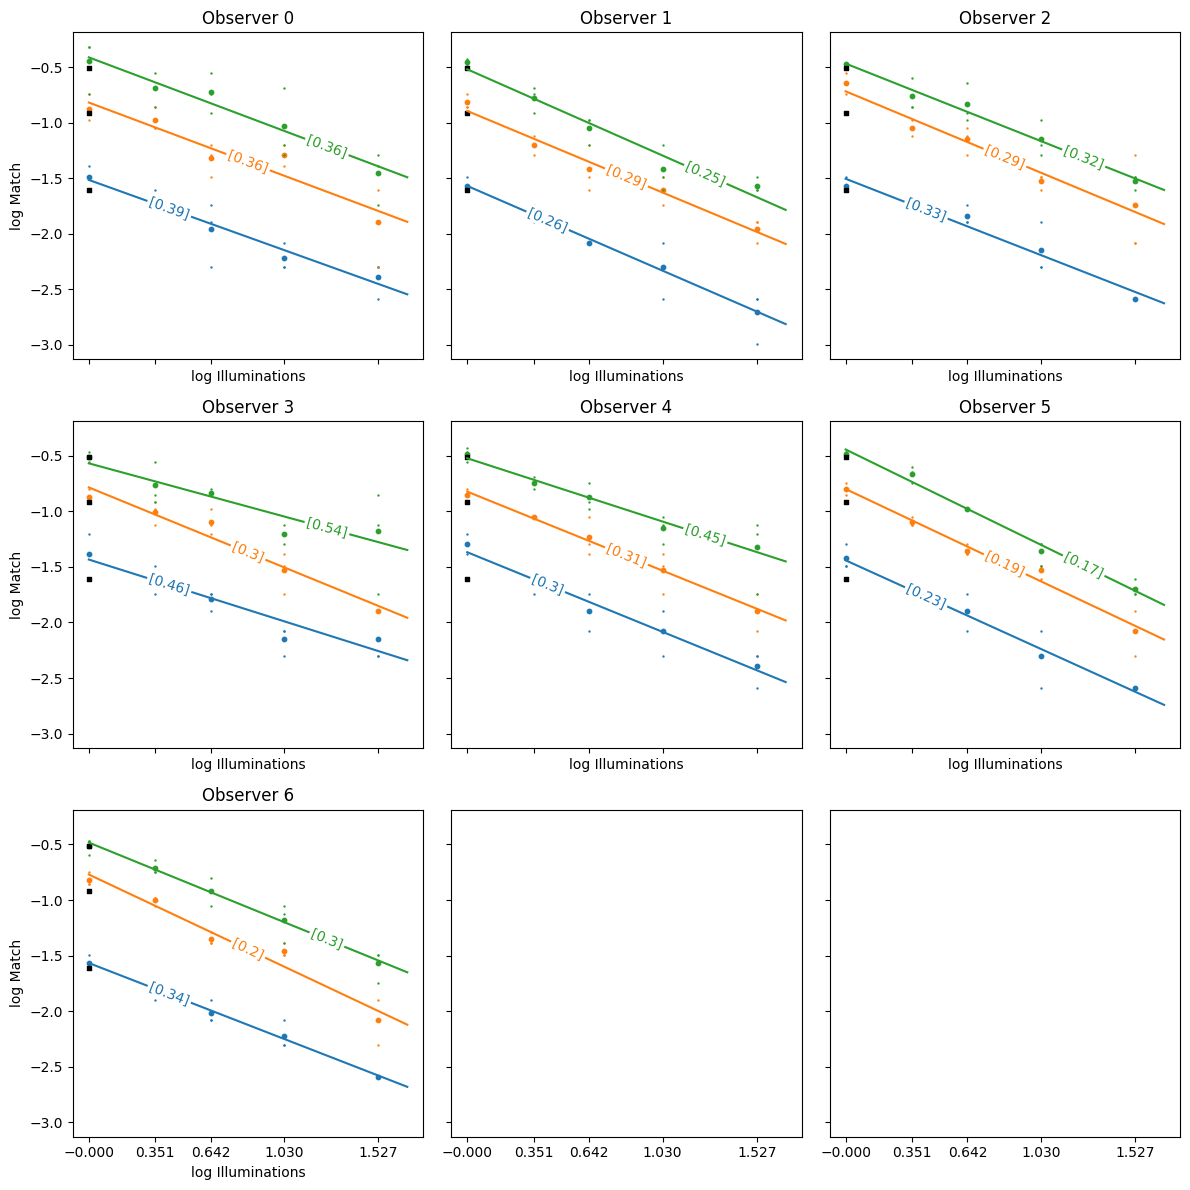

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


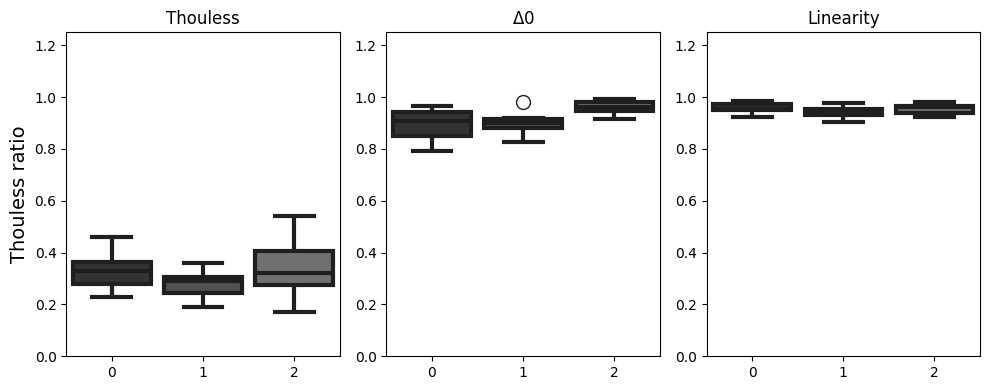

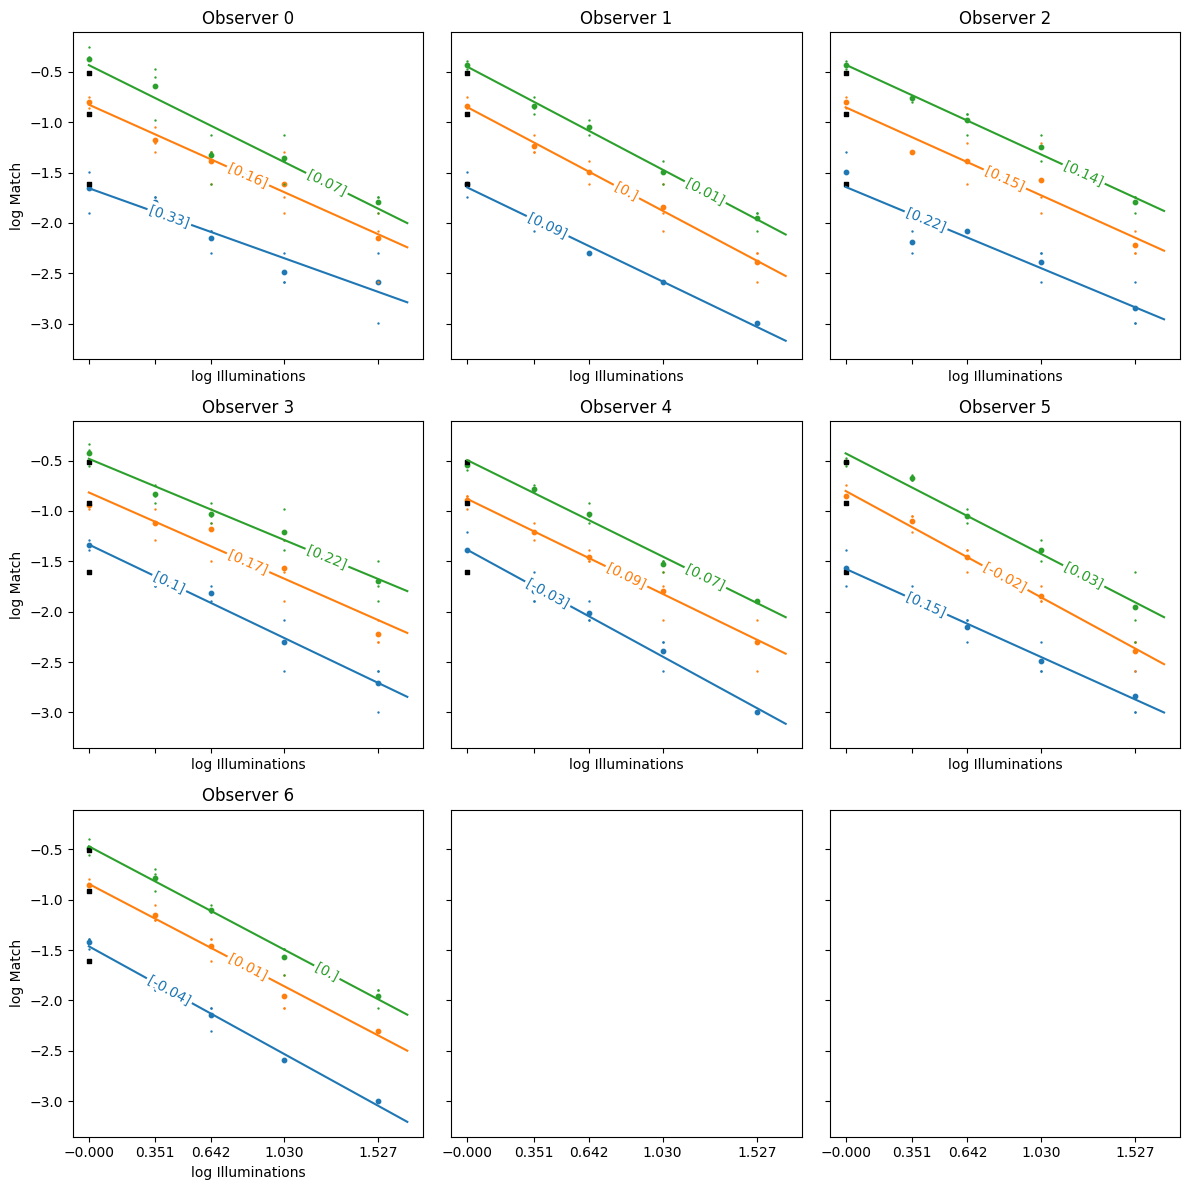

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


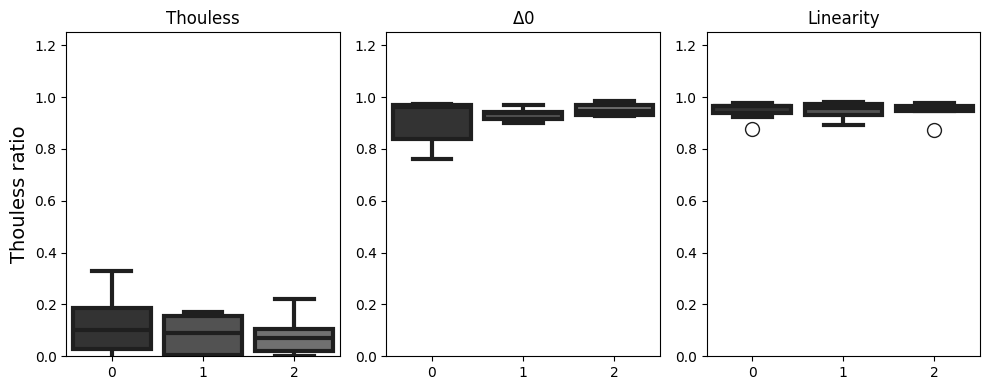

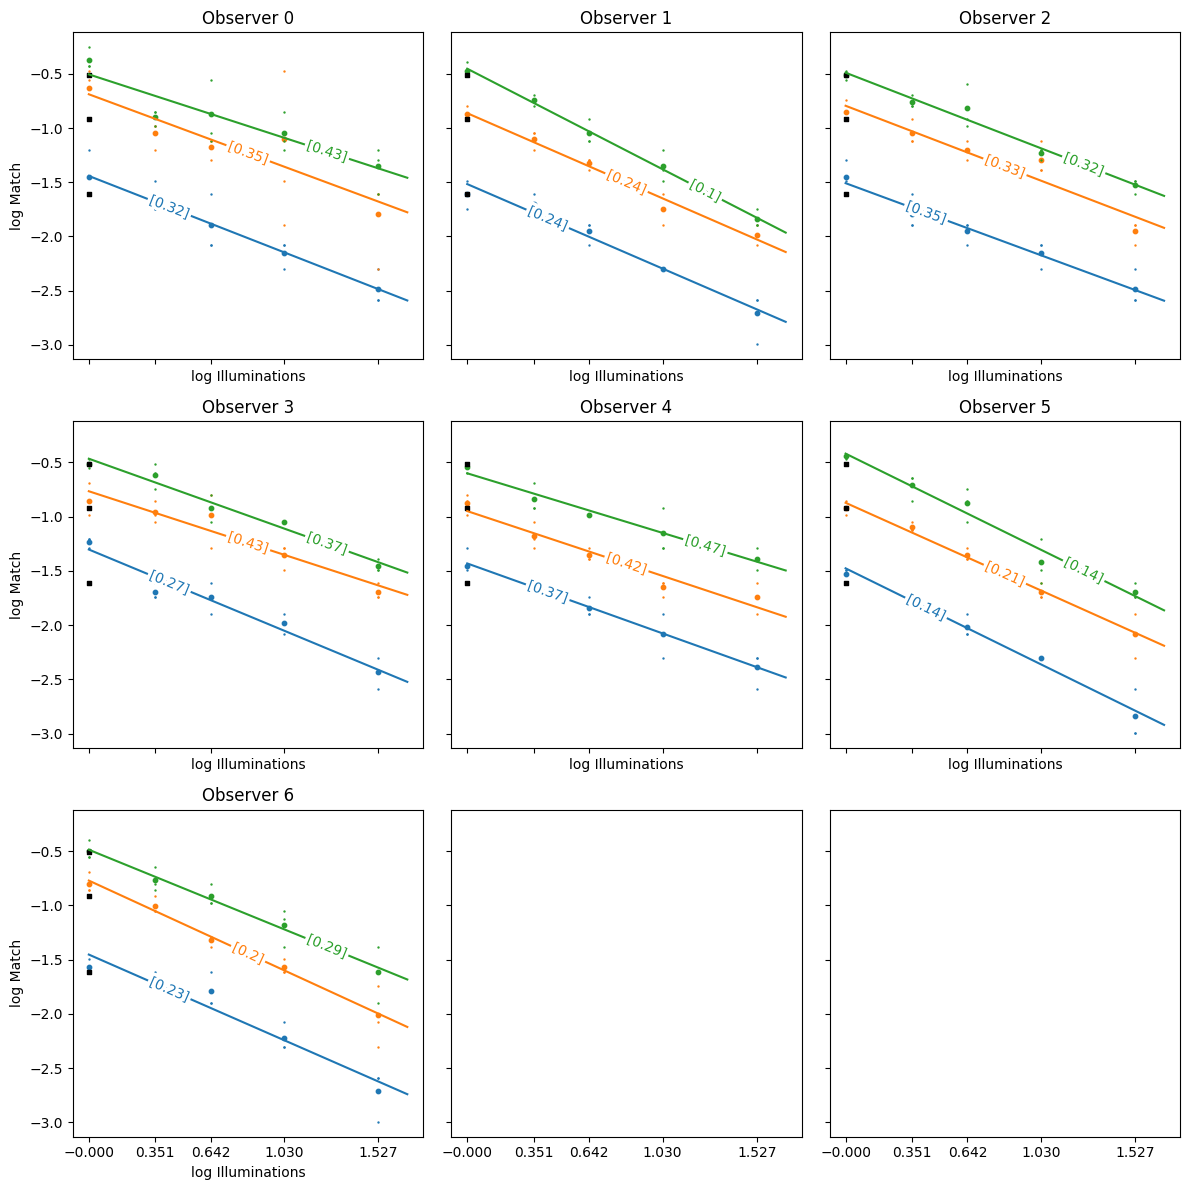

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


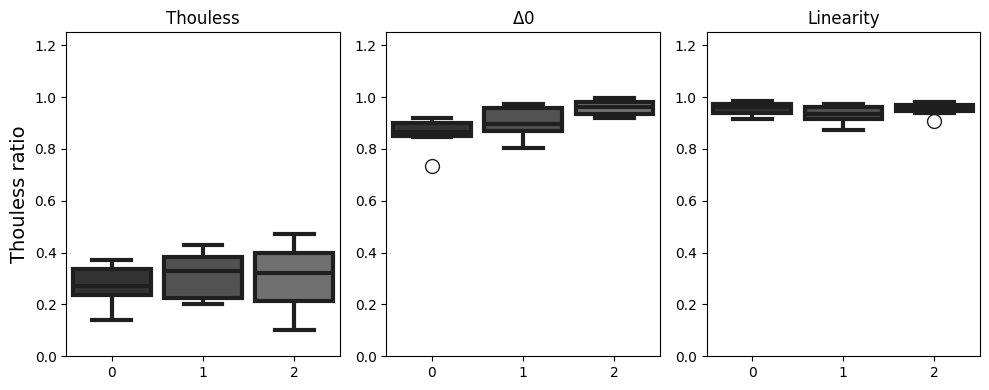

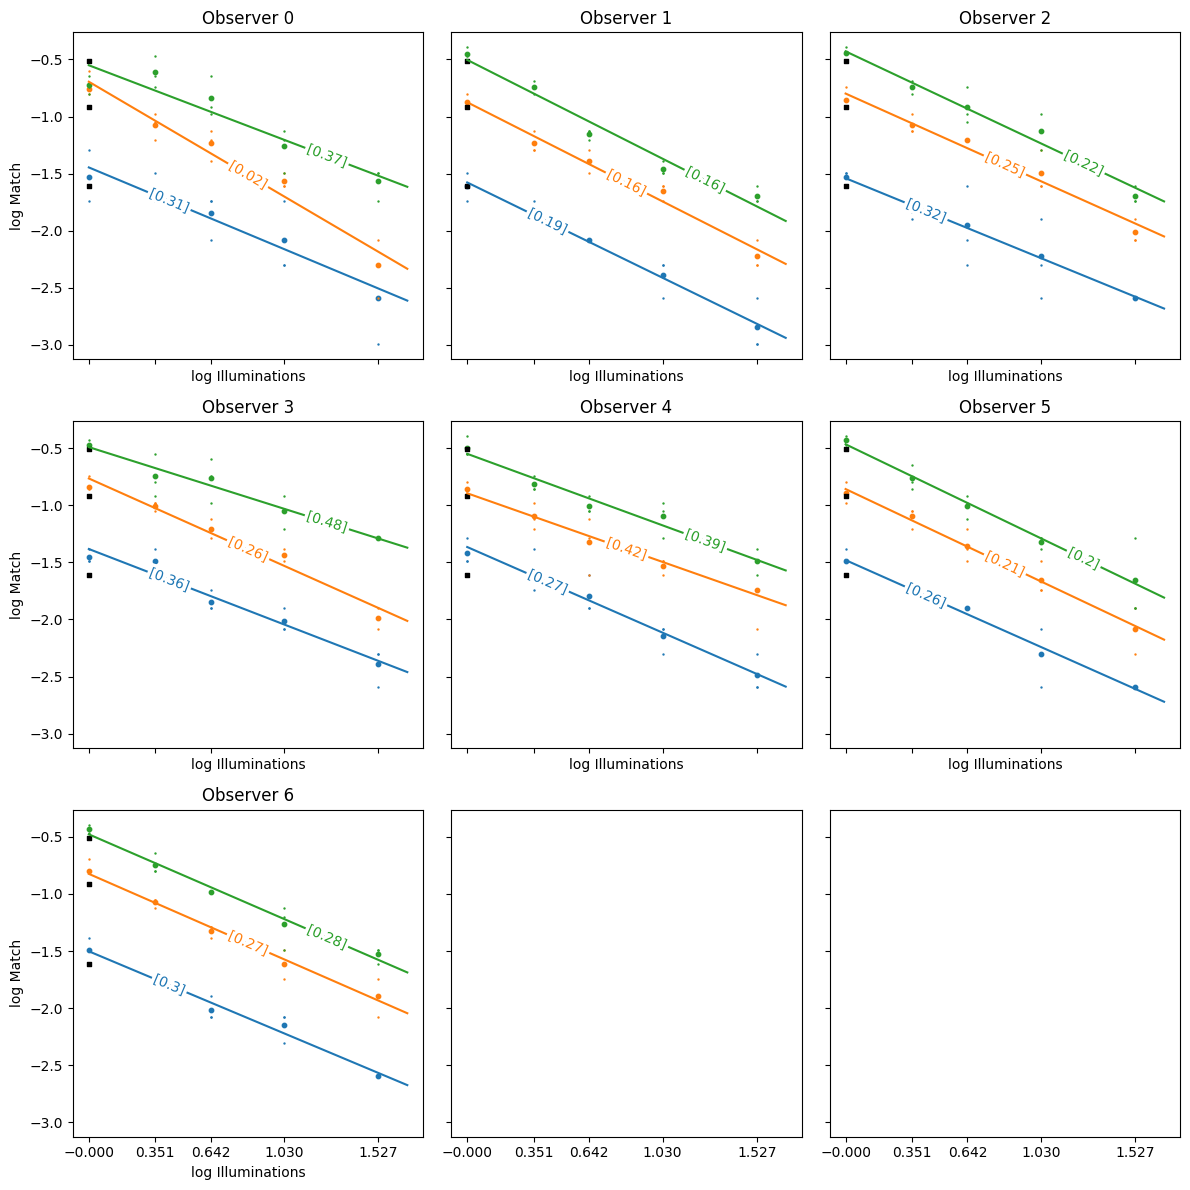

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


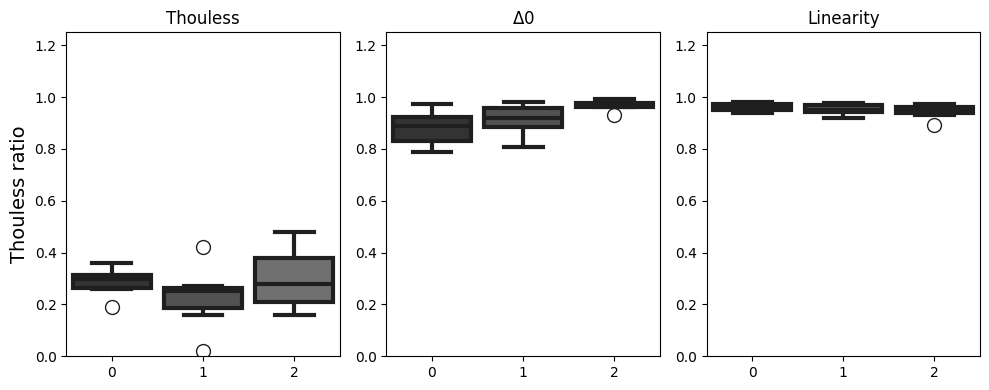

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:66: RuntimeWarning: divide by zero encountered in log
  subs[p // cols, p % cols].scatter(X, np.log(MATCHES[p, i, :, trial]), s=0.5, color=colors[i])


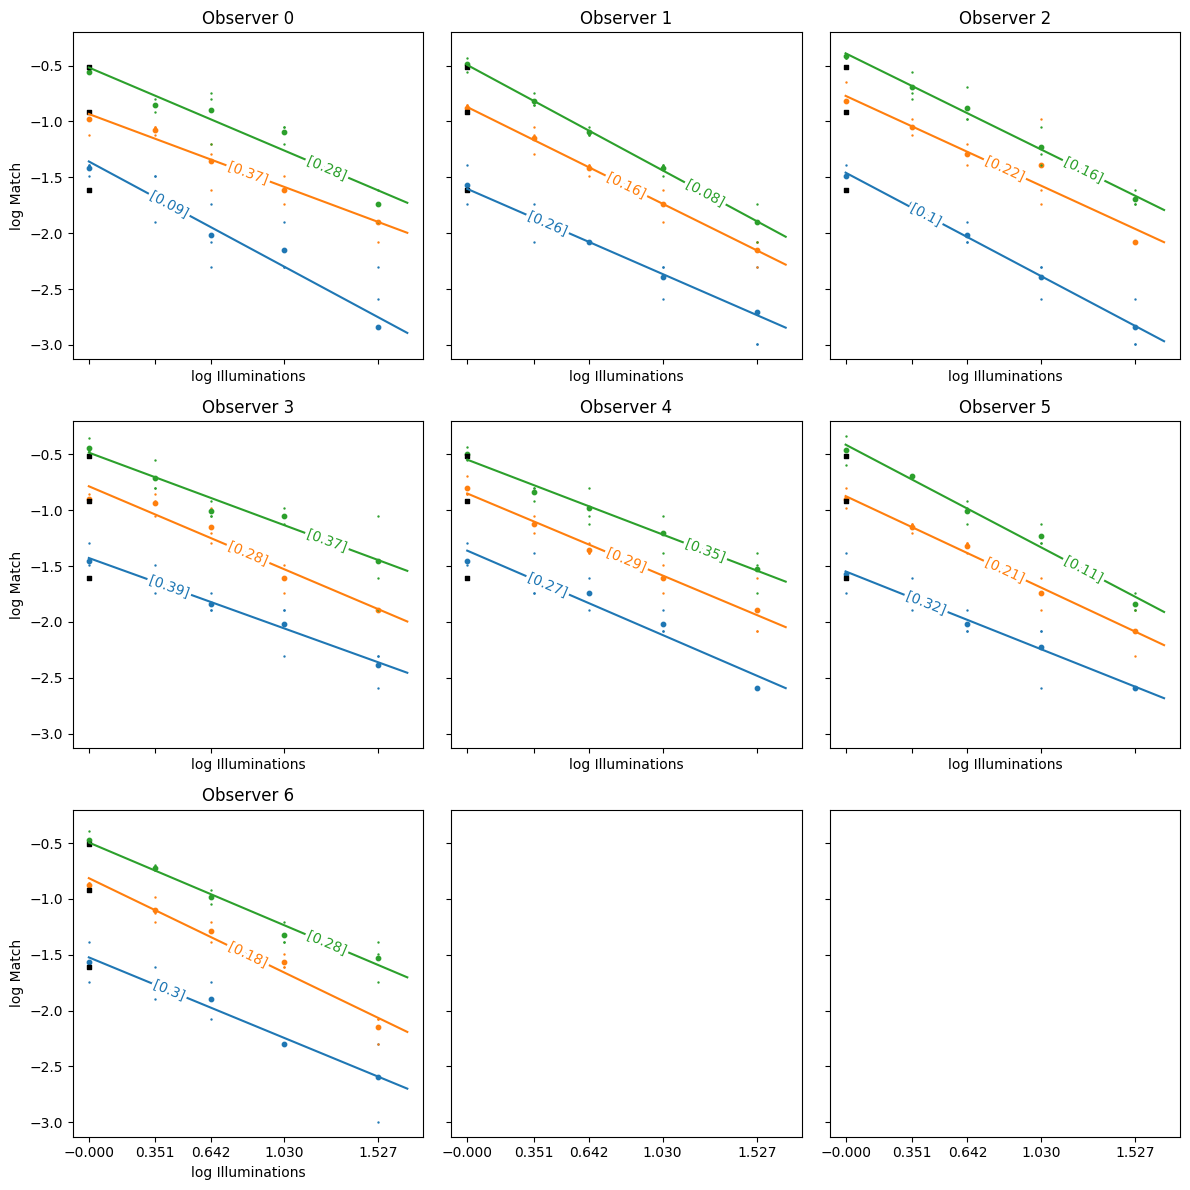

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


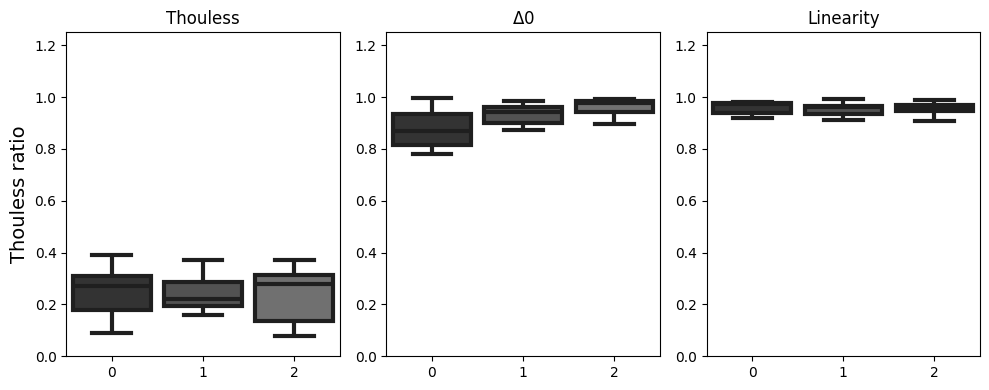

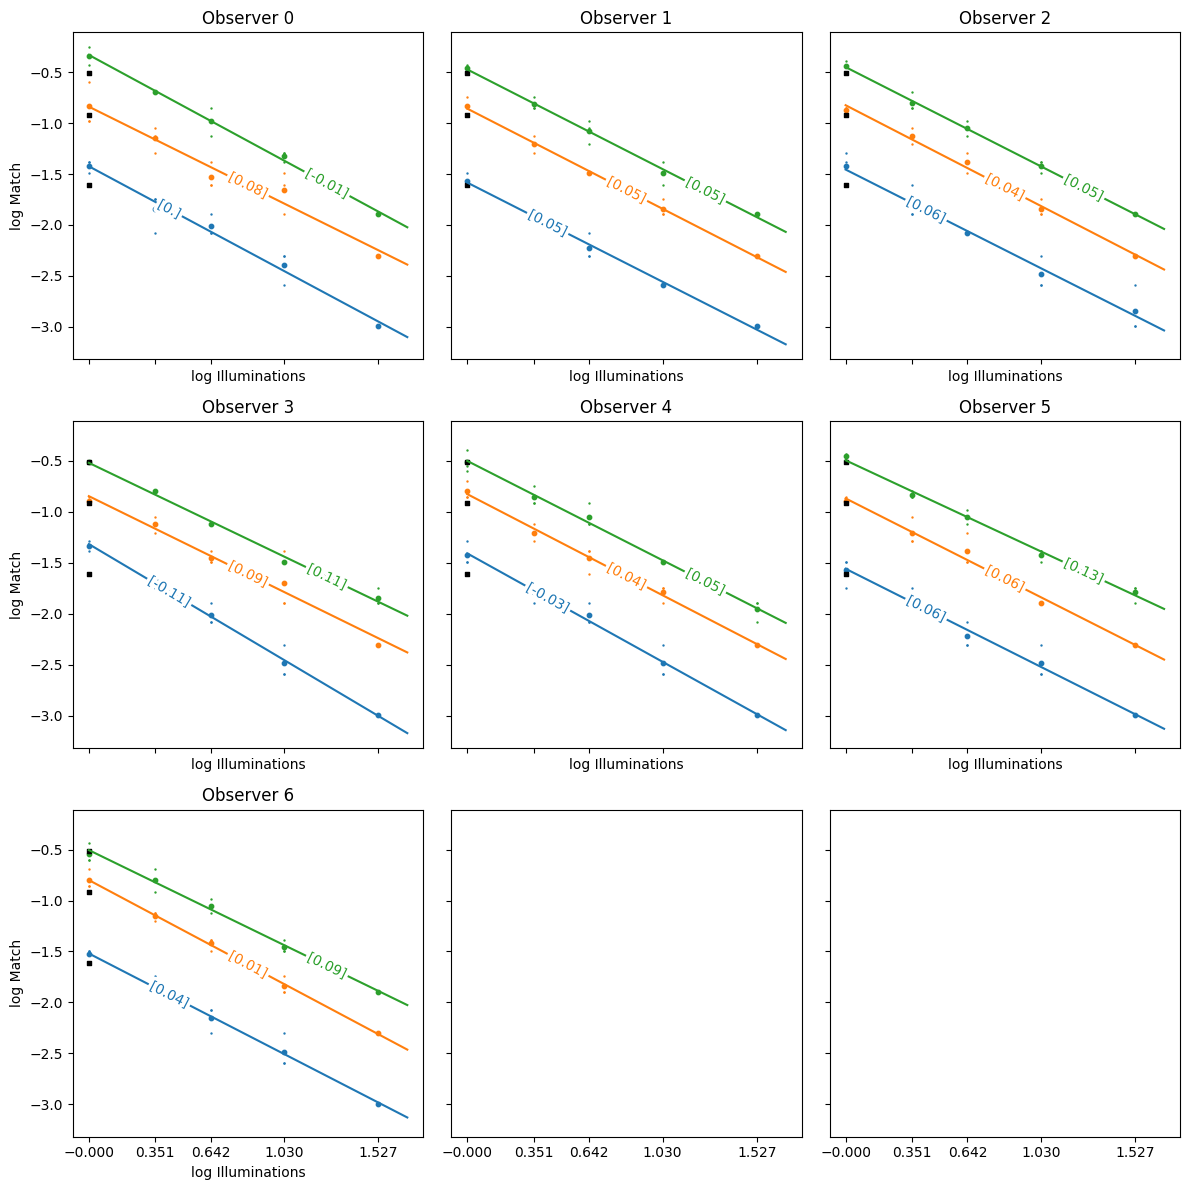

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


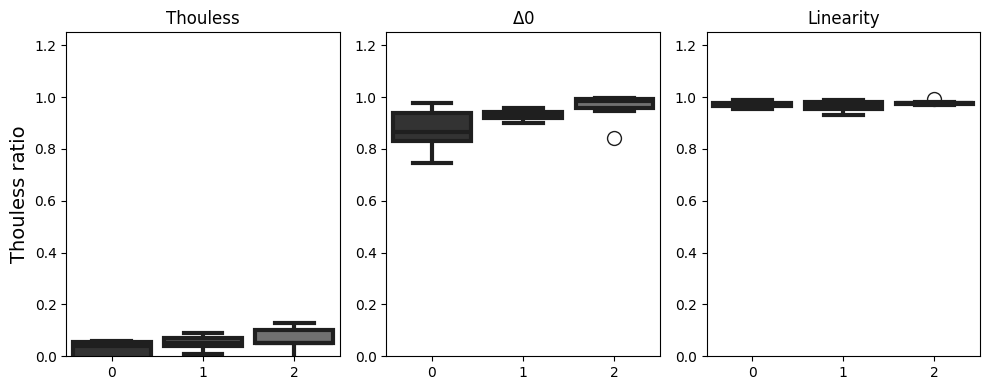

In [6]:
illumref, illumtest, MATCHES, STATS_eevee = analysis(list_labels_ref, dict_responsespercond_eevee, conditions)

In [7]:
nb_participants = 7
Thouless = np.zeros((len(conditions), nb_participants,3))
participants = Thouless.copy().astype(str)
CONDITIONS = Thouless.copy().astype(str)
#ps = ['lek', 'txh', 'rlt', 'krd', 'yxd', 'jmm', 'yxc']
ps = ['lek', 'txh', 'rlt', 'krd', 'yxd', 'jmm', 'yxc']
for c, condition in enumerate(conditions):
    Thouless[c] = STATS_eevee[condition]['thouless']
    CONDITIONS[c] = condition
    for p, pp in enumerate(ps):
        participants[c, p] = pp
        

Thouless = Thouless.reshape(-1, 3)
print(Thouless.mean(0))
REFs = np.zeros(Thouless.shape)

REFs[:,0] = 0.2
REFs[:,1] = 0.4
REFs[:,2] = 0.6
DATAT = {}
DATAT['Thouless'] = Thouless.flatten()
DATAT['Refs'] = REFs.flatten()
DATAT['ID'] = participants.flatten()
DATAT['conditions'] = CONDITIONS.flatten()



[0.21095238 0.19880952 0.2202381 ]


In [8]:
## Repeated anovas for references and conditions

import pandas as pd
import pingouin as pg

dfT_eevee = pd.DataFrame.from_dict(DATAT)

aov = pg.rm_anova(data=dfT_eevee, dv='Thouless', within='Refs', subject='ID', detailed=True)
print(aov)

aov2 = pg.rm_anova(data=dfT_eevee, dv='Thouless', within='conditions', subject='ID', detailed=True)
print(aov2)

  Source        SS  DF        MS         F     p-unc       ng2       eps
0   Refs  0.001617   2  0.000808  0.525851  0.604066  0.024354  0.662114
1  Error  0.018446  12  0.001537       NaN       NaN       NaN       NaN
       Source        SS  DF        MS         F         p-unc      ng2  \
0  conditions  0.457124   5  0.091425  27.41162  2.433630e-10  0.70346   
1       Error  0.100058  30  0.003335       NaN           NaN      NaN   

        eps  
0  0.544502  
1       NaN  


In [9]:
Thouless = Thouless.reshape(len(conditions),nb_participants,3)
for c, cond in enumerate(conditions):
    ttest = pg.ttest(Thouless[0].flatten(), Thouless[c].flatten())
    print(cond + '\n')
    print(ttest)

normal

          T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test  0.0   40   two-sided    1.0  [-0.06, 0.06]      0.0  0.303   0.05
cube

               T  dof alternative         p-val         CI95%   cohen-d  \
T-test  7.720606   40   two-sided  1.898164e-09  [0.17, 0.28]  2.382631   

             BF10  power  
T-test  3.988e+06    1.0  
sphere

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.662828   40   two-sided  0.511242  [-0.04, 0.08]  0.204553  0.361   

           power  
T-test  0.099171  
floor

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  1.496918   40   two-sided  0.142264  [-0.02, 0.11]  0.461959  0.735   

           power  
T-test  0.309232  
floorsphere

               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test  2.568083   40   two-sided  0.014067  [0.02, 0.13]  0.792528  3.802   

           power  
T-test  0.707492  
whole

         

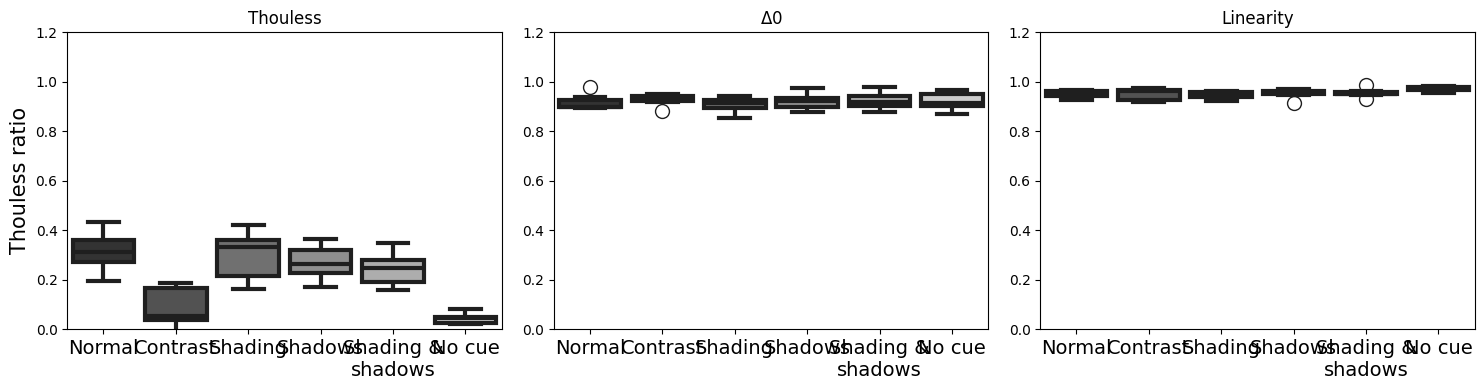

Mean thouless ratios are: [0.31619048 0.09142857 0.29619048 0.27142857 0.24142857 0.04333333]


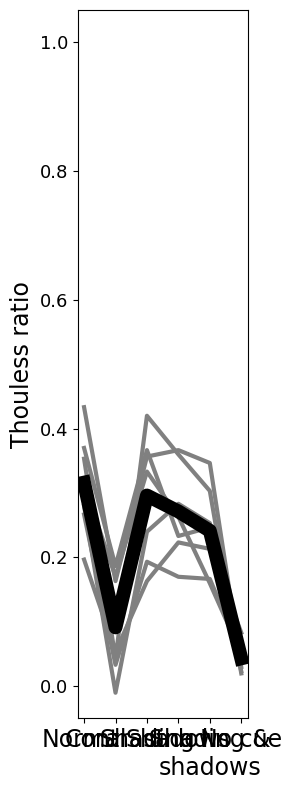

figures/Humans/Curves_conditions_TwoCubesBlendereevee2p9_Humans_allconditions.png


(<Figure size 300x800 with 1 Axes>,
 <Axes: ylabel='Thouless ratio'>,
 array([0.31619048, 0.09142857, 0.29619048, 0.27142857, 0.24142857,
        0.04333333]))

In [10]:
experiment = 'TwoCubesBlendereevee2p9_Humans'
xpname = experiment + '_allconditions'
rref = np.zeros(illumref['normal'].shape)
for c, i in enumerate(list_labels_ref):
    rref[:,c] = i
plot_conditions(illumref, illumtest, MATCHES, list_labels_ref, rref, colors_ref, conditions, xpname = xpname, cube = True)

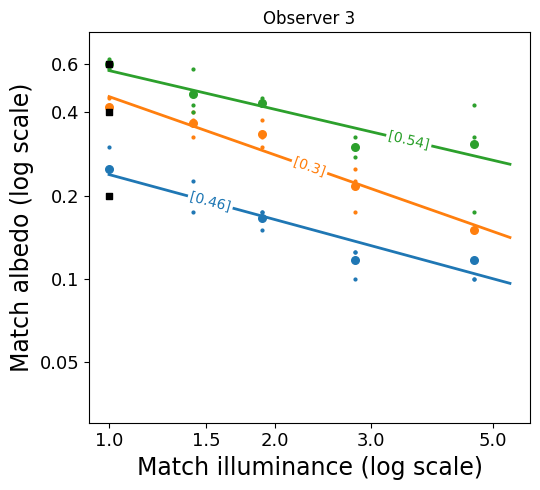

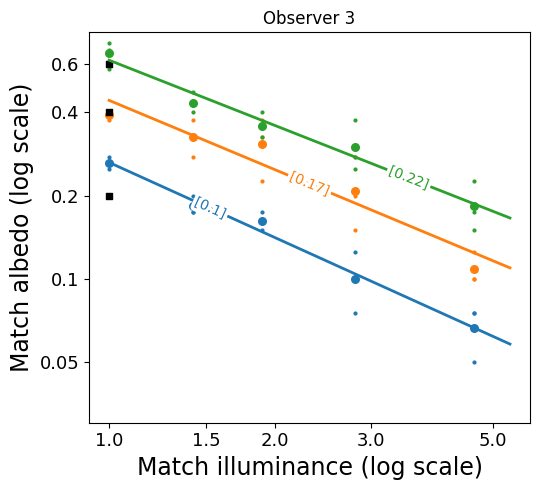

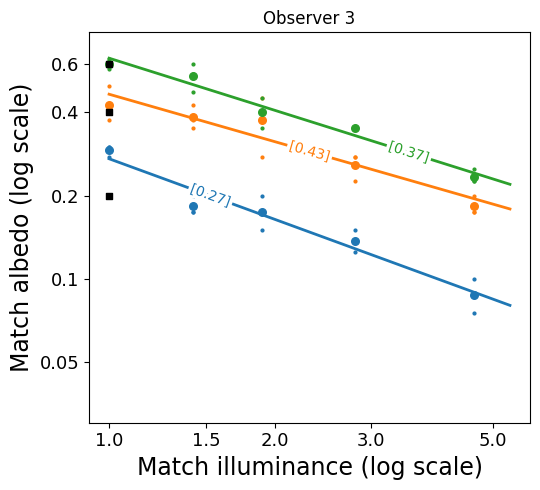

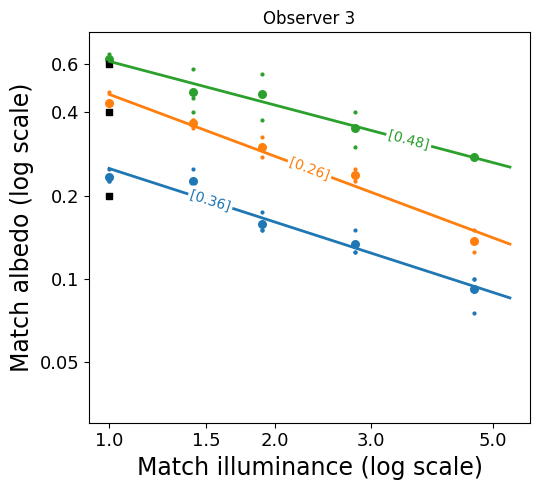

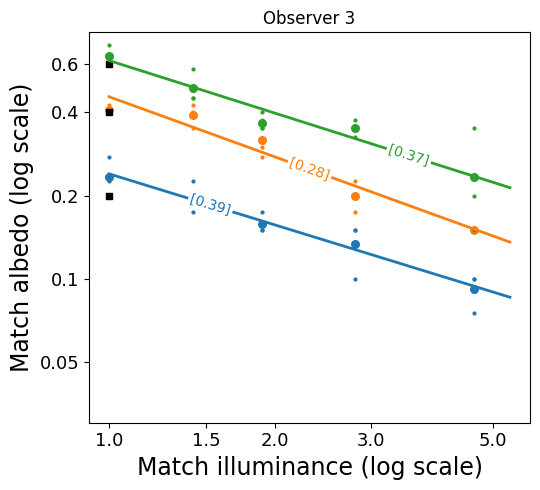

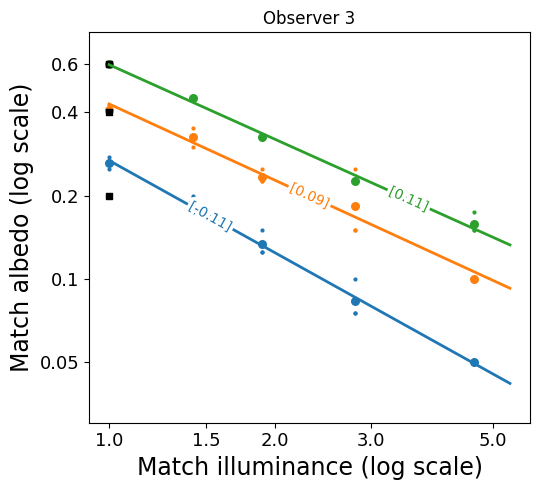

In [11]:
for condition in conditions:
    plot_linReg(illumref[condition], illumtest[condition], MATCHES[condition],list_labels_ref, rref, xpname=f'Humans_{condition}', p=3, lr=0)

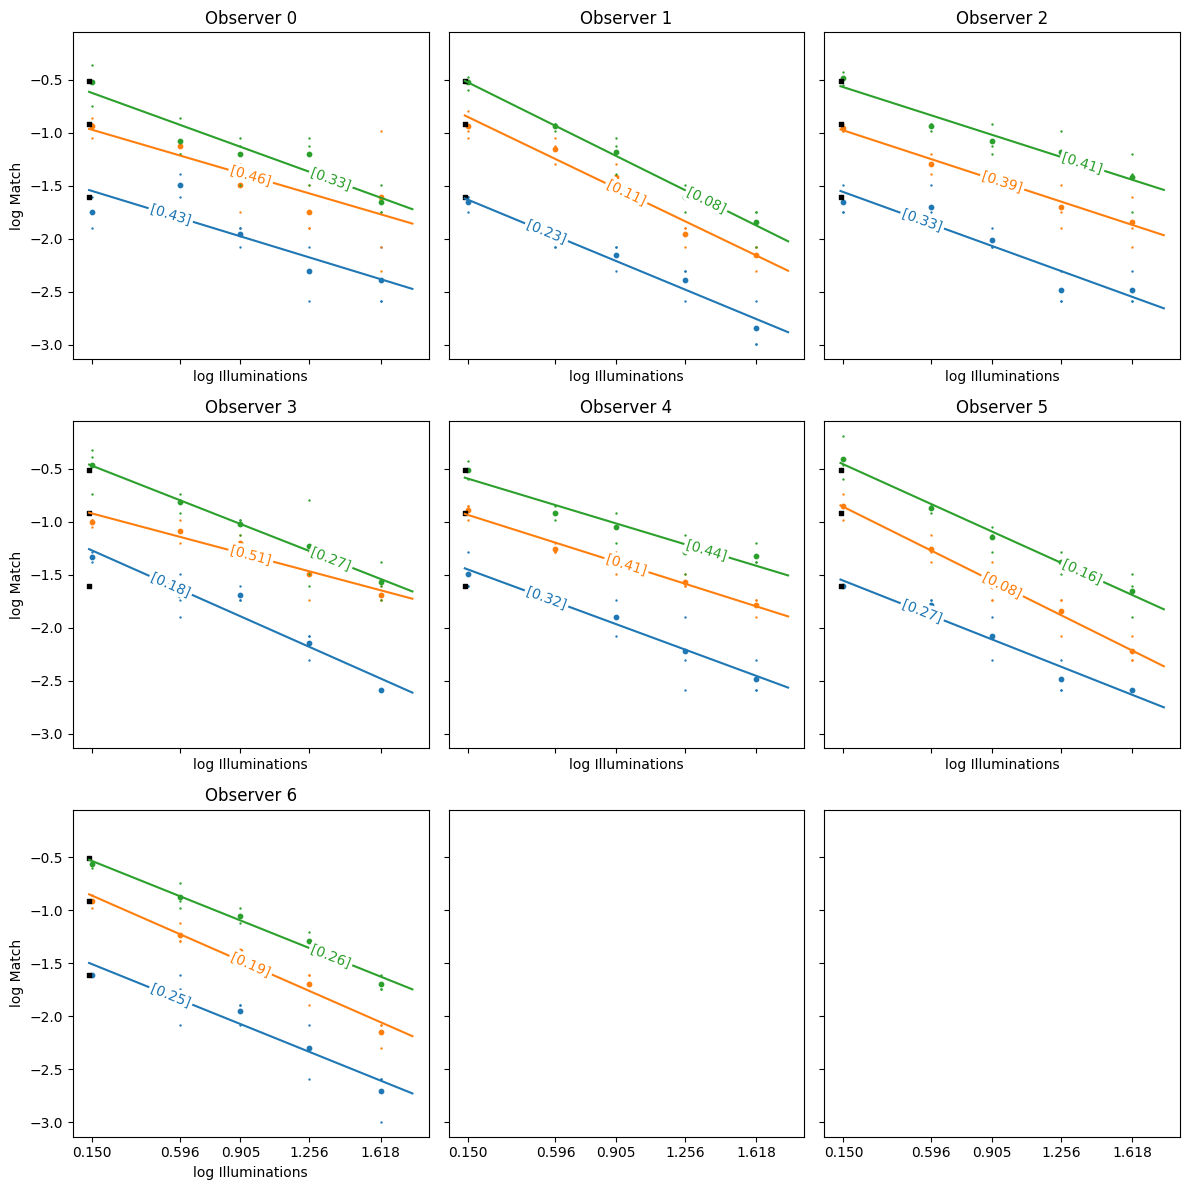

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, line

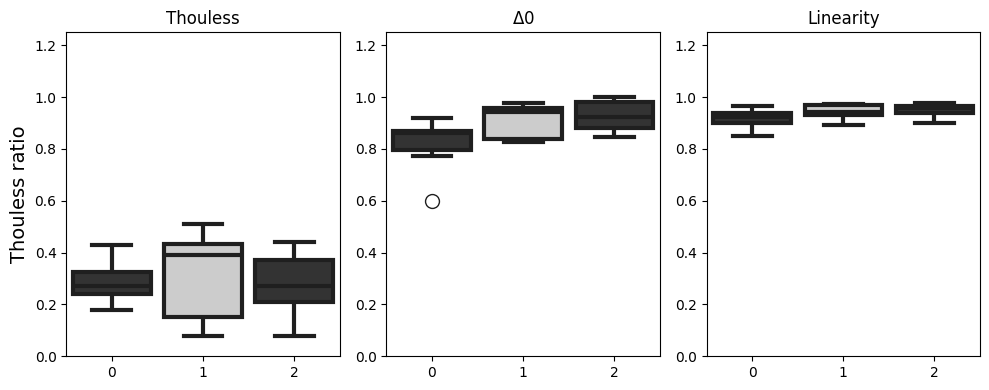

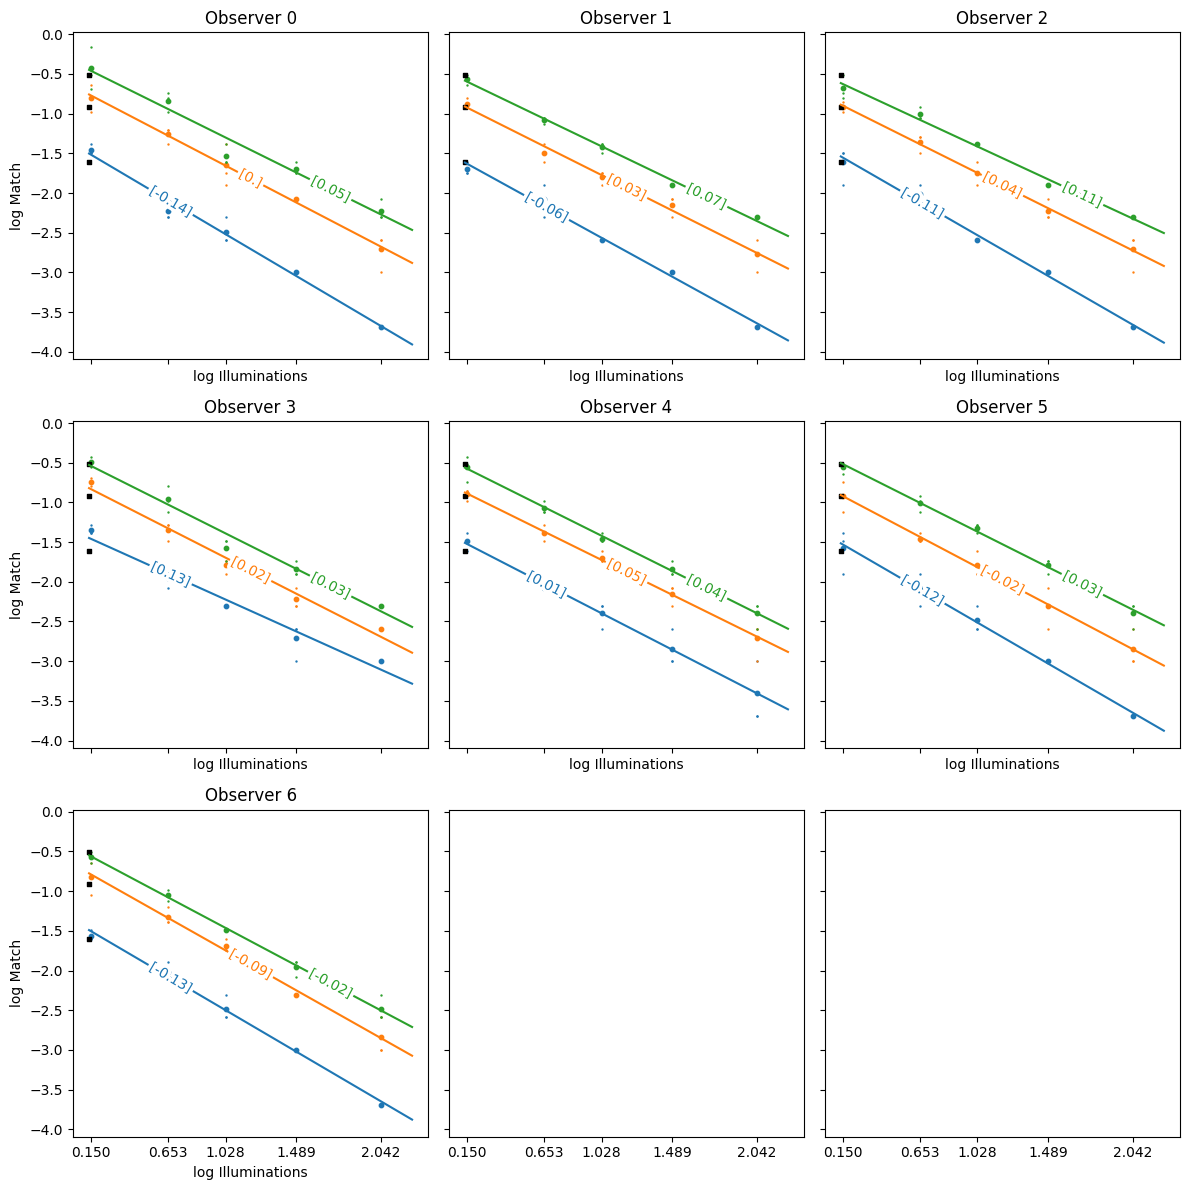

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:109: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:112: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:115: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, line

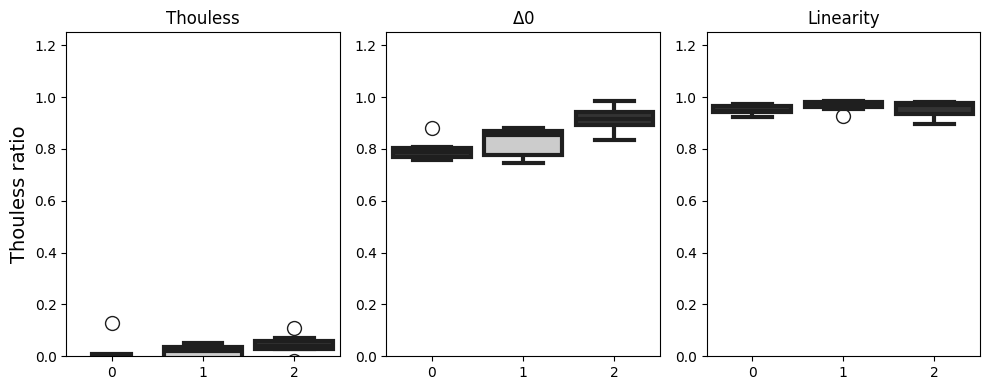

In [12]:
illumref, illumtest, MATCHES, STATS_cycles = analysis_cycles(list_labels_ref, dict_responsespercond_cycles, ['normal', 'whole'])

/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:318: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(ax=subs[0], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:321: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(ax=subs[1], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)
/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/lib_alban/libplot_metrics.py:324: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(ax=subs[2], data=dat, palette=colors_ref, linewidth=3, width=0.85, fliersize=10)


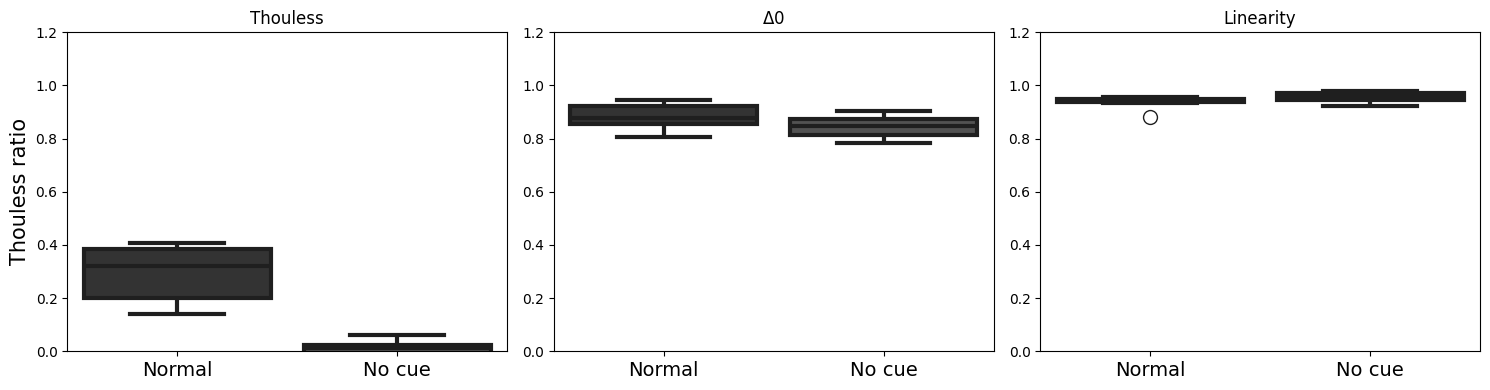

Mean thouless ratios are: [ 0.29095238 -0.00380952]


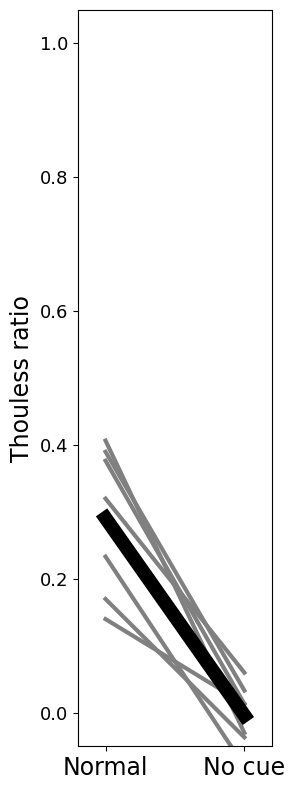

figures/Humans/Curves_conditions_TwoCubesBlendercycles2p9_Humans_allconditions.png


(<Figure size 300x800 with 1 Axes>,
 <Axes: ylabel='Thouless ratio'>,
 array([ 0.29095238, -0.00380952]))

In [13]:
experiment = 'TwoCubesBlendercycles2p9_Humans'
xpname = experiment + '_allconditions'
rref = np.zeros(illumref['normal'].shape)
for c, i in enumerate(list_labels_ref):
    rref[:,c] = i
plot_conditions(illumref, illumtest, MATCHES, list_labels_ref, rref, colors_ref, ['normal', 'whole'], xpname = xpname)

In [14]:
nb_participants = 7
conditions = ["normal", 'whole']
Thouless = np.zeros((len(conditions), nb_participants,3))
participants = Thouless.copy().astype(str)
CONDITIONS = Thouless.copy().astype(str)
#ps = ['lek', 'txh', 'rlt', 'krd', 'yxd', 'jmm', 'yxc']
ps = ['lek', 'txh', 'rlt', 'krd', 'yxd', 'jmm', 'yxc']
for c, condition in enumerate(conditions):
    Thouless[c] = STATS_cycles[condition]['thouless']
    CONDITIONS[c] = condition
    for p, pp in enumerate(ps):
        participants[c, p] = pp
    
Thouless = Thouless.reshape(-1, 3)
print(Thouless.mean(0))
REFs = np.zeros(Thouless.shape)

REFs[:,0] = 0.2
REFs[:,1] = 0.4
REFs[:,2] = 0.6
DATATcycles = {}
DATATcycles['Thouless'] = Thouless.flatten()
DATATcycles['Refs'] = REFs.flatten()
DATATcycles['ID'] = participants.flatten()
DATATcycles['conditions'] = CONDITIONS.flatten()



[0.11357143 0.15571429 0.16142857]


In [15]:
#### Crate one df for cycles, then merge it with that of eevee
dfT_cycles = pd.DataFrame.from_dict(DATATcycles)

dfT_eevee['dataset'] = 'eevee'
dfT_cycles['dataset'] = 'cycles'
dfT_both = pd.concat([dfT_eevee, dfT_cycles], ignore_index=True)
dfT_both

,Thouless,Refs,ID,conditions,dataset
0,0.39,0.2,lek,normal,eevee
1,0.36,0.4,lek,normal,eevee
2,0.36,0.6,lek,normal,eevee
3,0.26,0.2,txh,normal,eevee
4,0.29,0.4,txh,normal,eevee
...,...,...,...,...,...
163,-0.02,0.4,jmm,whole,cycles
164,0.03,0.6,jmm,whole,cycles
165,-0.13,0.2,yxc,whole,cycles
166,-0.09,0.4,yxc,whole,cycles


In [17]:
aov = pg.anova(data=dfT_both, dv='Thouless', between='dataset', detailed=True)
print(aov)

    Source        SS   DF        MS         F     p-unc       np2
0  dataset  0.139002    1  0.139002  6.143048  0.014193  0.035686
1   Within  3.756164  166  0.022627       NaN       NaN       NaN


In [ ]:
### Response times distribution

fig, sub = plt.subplots(1,1)
sub.hist(RESP, bins=400)
sub.set_xlim(0,10)
plt.show()
x, y = np.histogram(RESP, bins = 400)

In [ ]:
### Percentage of 

x[0]/np.sum(x)

In [ ]:
STATS_cycles